In [ ]:
!pip install langgraph

In [27]:
import os

os.environ["OPENAI_API_KEY"] = 'OPENAI_API_KEY'


In [28]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [29]:
class MultipleOpsState(TypedDict):
  adder: list[int]
  name: str



In [30]:
def add_num_node(state: MultipleOpsState):
  """This function adds numbers in a list"""
  total = 0
  for num in state["adder"]:
    total+= num

  print("SUm total = ", total)

def write_email_node(state: MultipleOpsState):
  """This function writes an email"""
  print(f"Hello {state['name']}\n Hope you are doing fine. \n Regards\n Jarvis")


In [33]:
graph = StateGraph(MultipleOpsState)

graph.add_node("add", add_num_node)
graph.add_node("email", write_email_node)
graph.add_edge('add','email')
graph.set_entry_point("add")
graph.set_finish_point("email")

app = graph.compile()

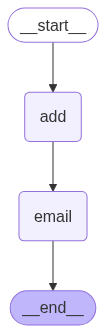

In [34]:
app

In [35]:
result = app.invoke({'adder': [1,5,3],'name':'Ashish'})

SUm total =  9
Hello Ashish
 Hope you are doing fine. 
 Regards
 Jarvis


In [36]:
result

{'adder': [1, 5, 3], 'name': 'Ashish'}